References:<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html<br>
https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html<br>
https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sam_size_WE = 1500
MaxStePE_WE = 10000
eva_size = 5000
MaxEPS = 26
MaxStePE = 100

In [3]:
#env = "GW"
env = "MR"
#env = "IC"
#env = "RiSw"
#File = "EXP_Results_GP_TM-M_L1_EVA-5000_MSK"
File = "EXP_Results_MR_TM-O_L1_EVA-5000_MSK"
#File = "EXP_Results_RiSw_TM-O_L1_EVA-5000_MSK"

step_size = 10 #MR,RiSw
#step_size = 100 #GW

In [4]:
def DataRecord(File, Model,eva_size, MaxStePE, MaxEPS, sam_size_WE, MaxStePE_WE):
    Record = pd.DataFrame()
    for sam_size in np.arange(1, MaxEPS, 1, dtype=int):
        Record_temp = pd.read_csv("./%s/%s_SAM%s_MAXST%s_EVA%s.csv" % (File, Model, sam_size, MaxStePE, eva_size))
        Record = pd.concat([Record, Record_temp], axis = 1)
    Record_temp = pd.read_csv("./%s/%s_SAM%s_MAXST%s_EVA%s.csv" % (File, Model, sam_size_WE, MaxStePE, eva_size))
    Record = pd.concat([Record, Record_temp], axis = 1)
    Record = Record.describe(percentiles = [0.1,0.2,0.3,0.5])
    Record.columns = [np.arange(1, MaxEPS+1, 1, dtype=int)]
    Record.rename(columns={MaxEPS+1:"MAX"},inplace=True)
    return Record
def DataSelected(File, ModelList, percentile, MaxEPS, sam_size_WE, MaxStePE_WE):
    RecordSelected = pd.DataFrame()
    for m in ModelList:
        Record = DataRecord(File, m,eva_size, MaxStePE, MaxEPS, sam_size_WE, MaxStePE_WE)
        R_temp = pd.DataFrame(Record.loc[percentile])
        m_1 = m.partition('P')[0]+m.partition('P')[1]+'s '+m.partition('P')[2]
        R_temp.columns=[m_1]
        RecordSelected = pd.concat([RecordSelected, R_temp], axis =1)
    RecordSelected.index = np.arange(1, MaxEPS+1, 1)*step_size
    RecordSelected.rename(index={MaxEPS*step_size:"M"},inplace=True)
    return RecordSelected

In [6]:
ModelList = ["NMDP",
             #"RMDP1.2","RMDP1.0","RMDP0.8","RMDP0.6","RMDP0.4","RMDP0.2",
             "RMDP1.2","RMDP0.2", #MR
             #"RMDP1.2","RMDP0.8",#IC
             #"RMDP1.2","RMDP1.0",#GW
             #"RMDP1.0","RMDP0.8",#RiSw
             
             #"RSMDP0.5","RSMDP0.6","RSMDP0.7","RSMDP0.8","RSMDP0.85","RSMDP0.9","RSMDP0.95","RSMDP1.0","RSMDP0.97", "RSMDP0.98", "RSMDP0.99",
             "RSMDP0.85","RSMDP0.9", #MR
             #"RSMDP0.6","RSMDP0.7",#IC
             #"RSMDP0.85","RSMDP0.9", #GW
             #"RSMDP0.8","RSMDP0.85",#RiSw "RSMDP0.95","RSMDP0.9", 
            ]
percentile = "10%"
RecordSelected = DataSelected(File, ModelList, percentile, MaxEPS, sam_size_WE, MaxStePE_WE)

In [7]:
RecordSelected

,NMDPs,RMDPs 1.2,RMDPs 0.2,RSMDPs 0.85,RSMDPs 0.9
10,0.000000,0.000000,0.00000,99.419990,105.199990
20,0.000000,0.000000,0.00000,103.766316,104.694627
30,0.000000,0.000000,0.00000,99.640740,99.640740
40,0.000000,0.000000,0.00000,101.999990,99.640740
50,0.000000,0.000000,0.00000,101.999990,99.640740
60,0.000000,0.000000,0.00000,105.199990,100.919990
70,0.000000,0.000000,0.00000,104.506990,99.640740
80,0.000000,0.000000,0.00000,101.999990,51.508649
90,0.000000,0.000000,0.00000,106.699990,99.640740
100,0.000000,0.000000,0.00000,105.199990,99.419990


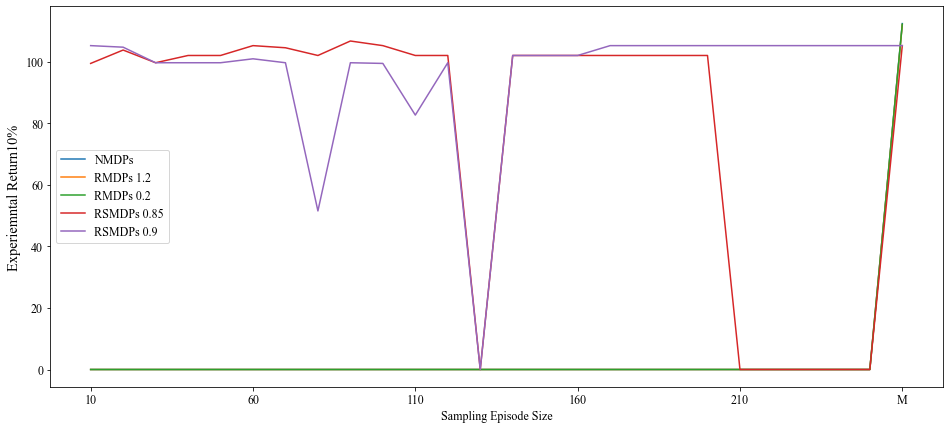

In [35]:
fig, axs = plt.subplots(figsize=(16, 7))

RecordSelected.plot(ax=axs)

axs.set_xlabel('Sampling Episode Size', fontsize='large')
axs.set_ylabel('Experiemntal Return'+str(percentile), fontsize='x-large')
"""ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))"""
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.legend(fontsize= 'large')
#plt.savefig('Scatter plot for all Cuisines.pdf', bbox_inches = 'tight')
plt.show()


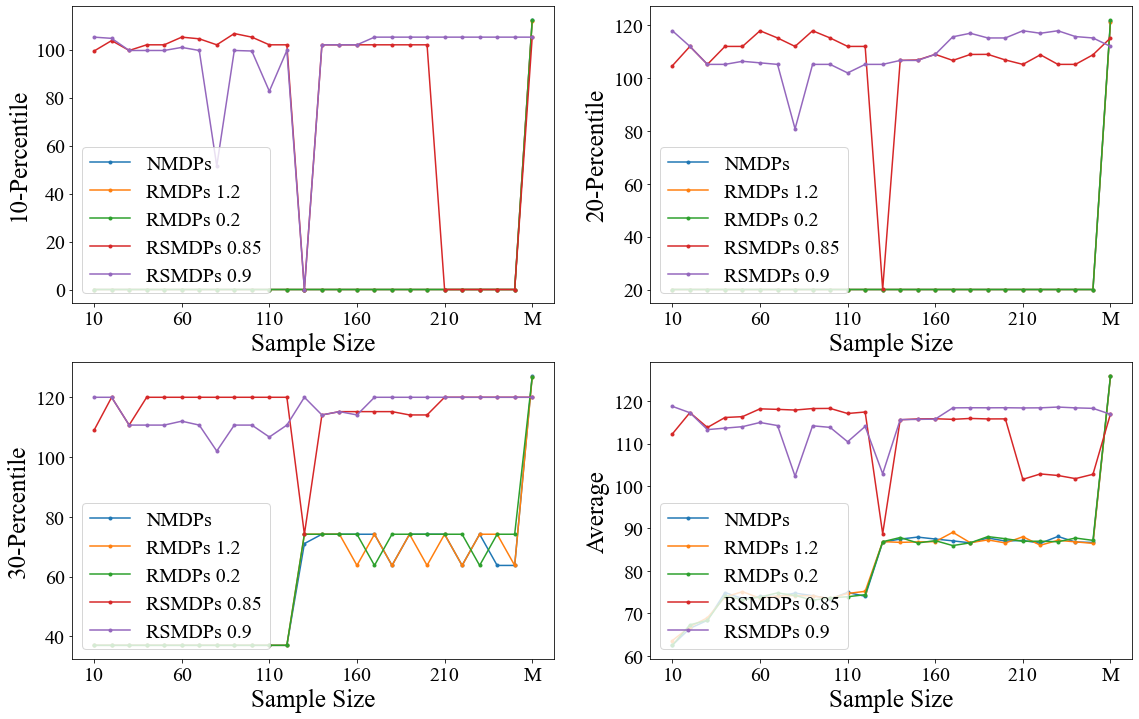

In [36]:
plt.rcParams["font.family"] = "Times New Roman"
fig, axs = plt.subplots(2,2,figsize=(19,12))

SelList = ["10%","20%","30%","mean"]
y_label = ["10-Percentile","20-Percentile","30-Percentile","Average"]
for i in range(4):
    Sel = SelList[i]
    RecordSelected = DataSelected(File, ModelList, Sel, MaxEPS, sam_size_WE, MaxStePE_WE)
    
    RecordSelected.plot(ax=axs[i//2,i%2],marker='.')
    #axs[i//2,i%2].set_title('RSMDP', fontsize=15)
    #axs[i//2,i%2].set(xlim=(0, 160), ylim=(0, 160))
    axs[i//2,i%2].set_xlabel('Sample Size', fontsize=25) # fontname = 'Times New Roman' #Sampling Episode Size
    axs[i//2,i%2].set_ylabel(y_label[i], fontsize=25)
    """ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))"""
    axs[i//2,i%2].legend(fontsize= 20,loc='lower left') #
    #axs[i//2,i%2].set_xticks(range(6))
    axs[i//2,i%2].tick_params(axis='both', which='major', labelsize=20)
    
#plt.xticks(fontsize='xx-large')
#plt.yticks(fontsize='xx-large')
plt.savefig('./Figure/percentiles_'+env+'.pdf', bbox_inches = 'tight')
plt.show()